In [3]:
#!pip install geopy
#!pip install python-google-places
%matplotlib inline
import pandas as pd
from datetime import datetime
from geopy.distance import geodesic
import geopy.distance
from geopy.distance import vincenty as VIN
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pylab as plot
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn import preprocessing
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.formula.api as sm



data = pd.read_csv(r"unique_mls_db_GIT.csv")
cpi=pd.read_csv(r"CPI.csv")


#coordinates of major go train stations in mississauga and nearby cities: Lisgar, Meadowvale, Streesville, _
#Erindale, Cocksville, Dixie, Kipling, Clarkson, Port Credit, and Long Branch

go_station_msga=[[43.5905809,-79.788362],[43.5976,-79.75369999999998],
                 [43.5762,-79.70910000000003],[43.5670973,-79.6689102],
                 [43.5819,-79.62369999999998],[43.607605,-79.5776749],
                 [43.6357039,-79.5372283],[43.51251816552179,-79.63435649871826],
                 [43.5555,-79.5874],[43.59133291164543,-79.54609036445617]]

#coordinates of major hospitals in mississauga

hospitals_msga = [[43.5713, -79.6084],[43.5594, -79.7033],[43.4507, -79.7639],[43.4962539,-79.8716229]]


In [4]:
data.head()

,mlsno,stno,stname,city,area,soldprice,solddate,type,style,bdrm,wshrm,latitude,longitude,house_condo,aptno,address,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,E3853125,46,Hinsley,Ajax,Northeast Ajax,595000,6/30/2017,Semi-Detached,2-Storey,3,3,43.891599,-79.028612,house,NaN,"46 Hinsley Cres, Ajax",NaN,NaN,NaN
1,E3833751,508,Norfolk,Pickering,Amberlea,677000,6/30/2017,Detached,2-Storey,3,3,43.827530,-79.123617,house,NaN,"508 Norfolk Sq, Pickering",NaN,NaN,NaN
2,N3788507,36,Innisvale,Markham,Cornell,725000,6/30/2017,Semi-Detached,2-Storey,4,3,43.900148,-79.238976,house,NaN,"36 Innisvale Dr, Markham",NaN,NaN,NaN
3,E3855735,14,Shudell,Toronto E01,Blake-Jones,755000,6/30/2017,Semi-Detached,2-Storey,2,2,43.675379,-79.337634,house,NaN,"14 Shudell Ave, Toronto",NaN,NaN,NaN
4,W3854388,2500,Hargood,Mississauga,Streetsville,1050000,6/30/2017,Detached,2-Storey,4,3,43.576264,-79.729552,house,NaN,"2500 Hargood Pl, Mississauga",NaN,NaN,NaN


In [5]:
data.describe()

,soldprice,bdrm,wshrm,latitude,longitude,Unnamed: 16,Unnamed: 17,Unnamed: 18
count,1.955240e+05,195524.000000,195524.000000,195524.000000,195524.000000,0.0,0.0,0.0
mean,7.656679e+05,2.830855,2.653142,43.727473,-79.468918,NaN,NaN,NaN
std,5.719666e+05,1.097000,1.238492,0.136501,0.233164,NaN,NaN,NaN
min,0.000000e+00,0.000000,0.000000,43.288120,-80.127424,NaN,NaN,NaN
25%,4.390000e+05,2.000000,2.000000,43.642452,-79.650354,NaN,NaN,NaN
50%,6.310000e+05,3.000000,2.000000,43.721190,-79.446030,NaN,NaN,NaN
75%,8.880000e+05,4.000000,3.000000,43.822972,-79.345323,NaN,NaN,NaN
max,2.588889e+07,9.000000,35.000000,44.155510,-78.687984,NaN,NaN,NaN


In [6]:
data_msga = data.loc[data['city']=='Mississauga']
data_msga.head()

,mlsno,stno,stname,city,area,soldprice,solddate,type,style,bdrm,wshrm,latitude,longitude,house_condo,aptno,address,Unnamed: 16,Unnamed: 17,Unnamed: 18
4,W3854388,2500,Hargood,Mississauga,Streetsville,1050000,6/30/2017,Detached,2-Storey,4,3,43.576264,-79.729552,house,NaN,"2500 Hargood Pl, Mississauga",NaN,NaN,NaN
38,W3817888,551,Cavell,Mississauga,Cooksville,668000,6/29/2017,Semi-Detached,Bungalow-Raised,3,2,43.563612,-79.622475,house,NaN,"551 Cavell Dr, Mississauga",NaN,NaN,NaN
39,W3850685,3582,Birchmeadow,Mississauga,Applewood,670000,6/29/2017,Semi-Detached,Bungalow-Raised,3,2,43.612874,-79.607933,house,NaN,"3582 Birchmeadow Cres, Mississauga",NaN,NaN,NaN
40,W3848786,4186,Uxbridge,Mississauga,Rathwood,804500,6/29/2017,Detached,2-Storey,3,3,43.616948,-79.613434,house,NaN,"4186 Uxbridge Lane, Mississauga",NaN,NaN,NaN
42,W3835920,4597,Centretown,Mississauga,Hurontario,889500,6/29/2017,Semi-Detached,2-Storey,4,4,43.595464,-79.664838,house,NaN,"4597 Centretown Way, Mississauga",NaN,NaN,NaN


In [7]:
def classifyHouseFees():
    
    global data_msga
    house_fees = {'house':1, 'condo':2}
    data_msga['house_fees'] = data_msga['house_condo'].map(house_fees)

In [8]:
def mapHouseArea():
    
    global data_msga
    house_area = {'Streetsville':1, 'Cooksville':2,'Applewood':3,'Rathwood':4,'Hurontario':5,'Central Erin Mills':6,'Mineola':7,'Clarkson':8,
                 'City Centre':9,'Meadowvale':10,'Malton':11,'Erin Mills':12,'Churchill Meadows':13,'Lisgar':14,'Port Credit':15,'East Credit':16,
                 'Creditview':17,'Meadowvale Village':18,'Lorne Park':19,'Fairview':20,'Mississauga Valleys':21,
                 'Erindale':22,'Sheridan':23,'Dixie':24,'Northeast':25,'Mavis-Erindale':26,'Gateway':27,
                 'Meadowvale Business Park':28,'Sheridan Park':29,'Southdown':30,'Port Credi':31,'City Centr':32,
                  'Lakeview':33,'Huttonville':34}    
    
    data_msga['house_area'] = data_msga['area'].map(house_area)

In [9]:
def adjustSoldPrice():
    
    global data_msga
    #add soldyear, soldmonth columns
    data_msga.loc[:,['solddate']] = pd.to_datetime(data_msga['solddate'])
    data_msga.insert(len(data_msga.columns),column='soldyear',value=pd.DatetimeIndex(data_msga['solddate']).year)
    data_msga.insert(len(data_msga.columns),column='soldmonth',value=pd.DatetimeIndex(data_msga['solddate']).month)

    #merge with CPI file and convert nominal sold prices to real sold prices with base case = 2015-07-31 

    cpi_targetrange=cpi[(pd.to_datetime(cpi['Date'])>=datetime(2015,7,1)) & (pd.to_datetime(cpi['Date'])<=datetime(2017,6,30))]
    cpi_targetrange.insert(len(cpi_targetrange.columns),column='soldyear',
                           value=pd.DatetimeIndex(cpi_targetrange['Date']).year)
    cpi_targetrange.insert(len(cpi_targetrange.columns),column='soldmonth',
                           value=pd.DatetimeIndex(cpi_targetrange['Date']).month)
    data_msga=pd.merge(cpi_targetrange, data_msga, on=['soldyear','soldmonth'], how='outer')
    cpibase=float(cpi_targetrange['PX_LAST'][pd.to_datetime(cpi_targetrange['Date'])==datetime(2015,7,31)])
    data_msga.insert(len(data_msga.columns),column='cpibase',value=cpibase)
    data_msga.insert(len(data_msga.columns),column='adjustedSoldPrice',value=
                    round(data_msga['soldprice']*data_msga['cpibase']/data_msga['PX_LAST'],0))

In [10]:
#take a house's coordinates and calculate minimum distance of a house to GO stations 
def closestGoHospital():
    global data_msga
    
    data_msga_coordinate = data_msga[['latitude','longitude']].values
    mindist_GO = []
    mindist_Hospital = []
    for i in range(len(data_msga_coordinate)):
        tempGO = []
        tempHospital = []
        for j in range(len(go_station_msga)):
            tempGO.append(geodesic(go_station_msga[j], data_msga_coordinate[i]).meters)
        mindist_GO.append(round(min(tempGO), 2))

        for j in range(len(hospitals_msga)):
            tempHospital.append(geodesic(hospitals_msga[j], data_msga_coordinate[i]).meters)
        mindist_Hospital.append(round(min(tempHospital),2))
        
    #add the minimum distance to the dataframe

    data_msga.insert(len(data_msga.columns),column='mindist_GO',value=mindist_GO)
    data_msga.insert(len(data_msga.columns),column='mindist_Hospital',value=mindist_Hospital)

In [11]:
def classifySeasons():
    
    global data_msga
    data_msga['season'] = 0
    #summer season is from June to August
    data_msga.loc[(data_msga.soldmonth<=8 ) & (data_msga.soldmonth >=6),'season']= 1
    
    #shoulder season from Aprint to May and September to November
    data_msga.loc[((data_msga.soldmonth<=11 ) & (data_msga.soldmonth >=9)) | ((data_msga.soldmonth >=4) & (data_msga.soldmonth <=5)),'season']= 2
    
    #winter season from December to March
    data_msga.loc[(data_msga.soldmonth==12 ) | (data_msga.soldmonth >=1) & (data_msga.soldmonth <=3),'season']= 3

In [12]:
def rescaledistance():
    global data_msga
    data_msga.insert(len(data_msga.columns),column='mindist_GO_min',value=data_msga['mindist_GO'].min()-0.000001)
    data_msga.insert(len(data_msga.columns),column='mindist_GO_max',value=data_msga['mindist_GO'].max()+0.000001)
    data_msga.insert(len(data_msga.columns),column='mindist_Hospital_min',value=data_msga['mindist_Hospital'].min()-0.000001)
    data_msga.insert(len(data_msga.columns),column='mindist_Hospital_max',value=data_msga['mindist_Hospital'].max()+0.000001)

    data_msga.insert(len(data_msga.columns),column='mindist_GO_score',
                     value=(data_msga['mindist_GO']-data_msga['mindist_GO_min'])/
                     (data_msga['mindist_GO_max']-data_msga['mindist_GO_min']))
    data_msga.insert(len(data_msga.columns),column='mindist_Hospital_score',
                     value=(data_msga['mindist_Hospital']-data_msga['mindist_Hospital_min'])/
                     (data_msga['mindist_Hospital_max']-data_msga['mindist_Hospital_min']))

In [13]:
def houseType():
    
    #Categorize house types: 1 = town house, 2 = detached, 3 = semi-detached, 4 = condo; 
    #Drop the remaining house types including vacant land, link house, mobile trailer etc. 
    global data_msga
    house_types = {'Att/Row/Twnhouse':1, 'Condo Townhouse':1,'Det W/Com Elements':2,'Detached':2,'Semi-Det Condo':3,
               'Semi-Detached':3,'Comm Element Condo':4,'Condo Ap':4,'Condo Apartment':4,'Condo Apt':4,
               'Condo To':4,'Det Condo':4,'Leasehold Condo':4,}

    data_msga['house_type'] = data_msga['type'].map(house_types)
    data_msga=data_msga.dropna(subset=['house_type'])


In [14]:
def logrealsoldprice():
    global data_msga
    data_msga.insert(len(data_msga.columns),column='log_real_prices',
                         value=np.log(data_msga['adjustedSoldPrice']/1000000))
    data_msga = data_msga[(data_msga['log_real_prices']>-2) & (data_msga['log_real_prices']<1.5)]

In [15]:
def excludeoutliner():
    global data_msga
    #exclude Malton, and replace group 11 (Malton) with the last grup 34
    data_msga=data_msga[data_msga['area']!='Malton']
    data_msga.house_area[data_msga.house_area==34] = 11

    #exclude distance outliners
    data_msga = data_msga[data_msga['mindist_GO_score']<0.15]
    data_msga = data_msga[data_msga['mindist_Hospital_score']<0.18]

In [16]:
classifyHouseFees()
mapHouseArea()    
adjustSoldPrice()
closestGoHospital()
classifySeasons()
houseType()
rescaledistance()
logrealsoldprice()
excludeoutliner()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21227 entries, 0 to 22471
Data columns (total 38 columns):
Date                      21227 non-null object
PX_LAST                   21227 non-null float64
soldyear                  21227 non-null int64
soldmonth                 21227 non-null int64
mlsno                     21227 non-null object
stno                      21227 non-null object
stname                    21227 non-null object
city                      21227 non-null object
area                      21227 non-null object
soldprice                 21227 non-null int64
solddate                  21227 non-null datetime64[ns]
type                      21227 non-null object
style                     21227 non-null object
bdrm                      21227 non-null int64
wshrm                     21227 non-null int64
latitude                  21227 non-null float64
longitude                 21227 non-null float64
house_condo               21227 non-null object
aptno                

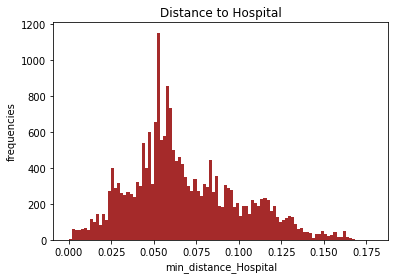

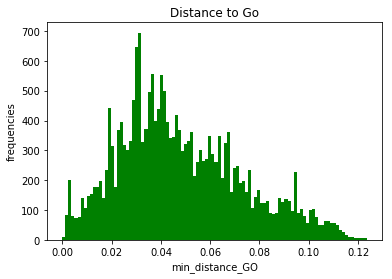

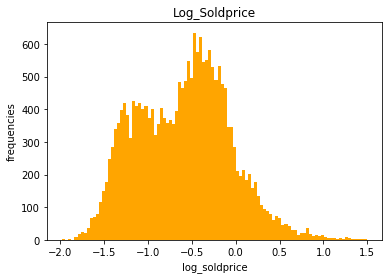

In [17]:

data_msga.info()
n,bins,patches=plt.hist(data_msga['mindist_Hospital_score'][data_msga['mindist_Hospital_score']<0.18],100,facecolor='brown')
plt.xlabel('min_distance_Hospital')
plt.ylabel('frequencies')
plt.title('Distance to Hospital')
plot.show()

n,bins,patches=plt.hist(data_msga['mindist_GO_score'][data_msga['mindist_GO_score']<0.15],100,facecolor='green')
plt.xlabel('min_distance_GO')
plt.ylabel('frequencies')
plt.title('Distance to Go')
plot.show()

n,bins,patches=plt.hist(data_msga['log_real_prices'],100,facecolor='orange')
plt.xlabel('log_soldprice')
plt.ylabel('frequencies')
plt.title('Log_Soldprice')
plot.show()



In [18]:
#clean unwanted coloumns
data_msga.drop(['latitude','longitude','Date','area','soldyear','house_condo',
                'soldmonth','city','stno','stname','PX_LAST','style','cpibase',
                'aptno','mlsno','type','address','solddate','soldprice','adjustedSoldPrice',
                'mindist_GO','mindist_Hospital','mindist_GO_min','mindist_GO_max',
               'mindist_Hospital_min','mindist_Hospital_max'], axis=1,inplace = True)

In [19]:
data_msga

,bdrm,wshrm,Unnamed: 16,Unnamed: 17,Unnamed: 18,house_fees,house_area,season,house_type,mindist_GO_score,mindist_Hospital_score,log_real_prices
0,4,3,NaN,NaN,NaN,1,1,1,2.0,0.033823,0.046684,0.024730
1,3,2,NaN,NaN,NaN,1,2,1,3.0,0.041841,0.021686,-0.427527
2,3,2,NaN,NaN,NaN,1,3,1,3.0,0.051859,0.078459,-0.424538
3,3,3,NaN,NaN,NaN,1,4,1,2.0,0.063518,0.086782,-0.241594
4,4,4,NaN,NaN,NaN,1,5,1,3.0,0.065637,0.086465,-0.141156
5,4,4,NaN,NaN,NaN,1,5,1,2.0,0.087531,0.099936,-0.123881
6,4,3,NaN,NaN,NaN,1,6,1,2.0,0.013384,0.030630,0.034209
7,4,4,NaN,NaN,NaN,1,5,1,2.0,0.090723,0.103307,0.029480
8,2,2,NaN,NaN,NaN,1,7,1,2.0,0.037859,0.042870,0.052901
9,4,4,NaN,NaN,NaN,1,6,1,2.0,0.034355,0.014216,0.354376


In [20]:
#Check if any value in the dataframe is Null
data_msga.isnull().values.any()

True

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


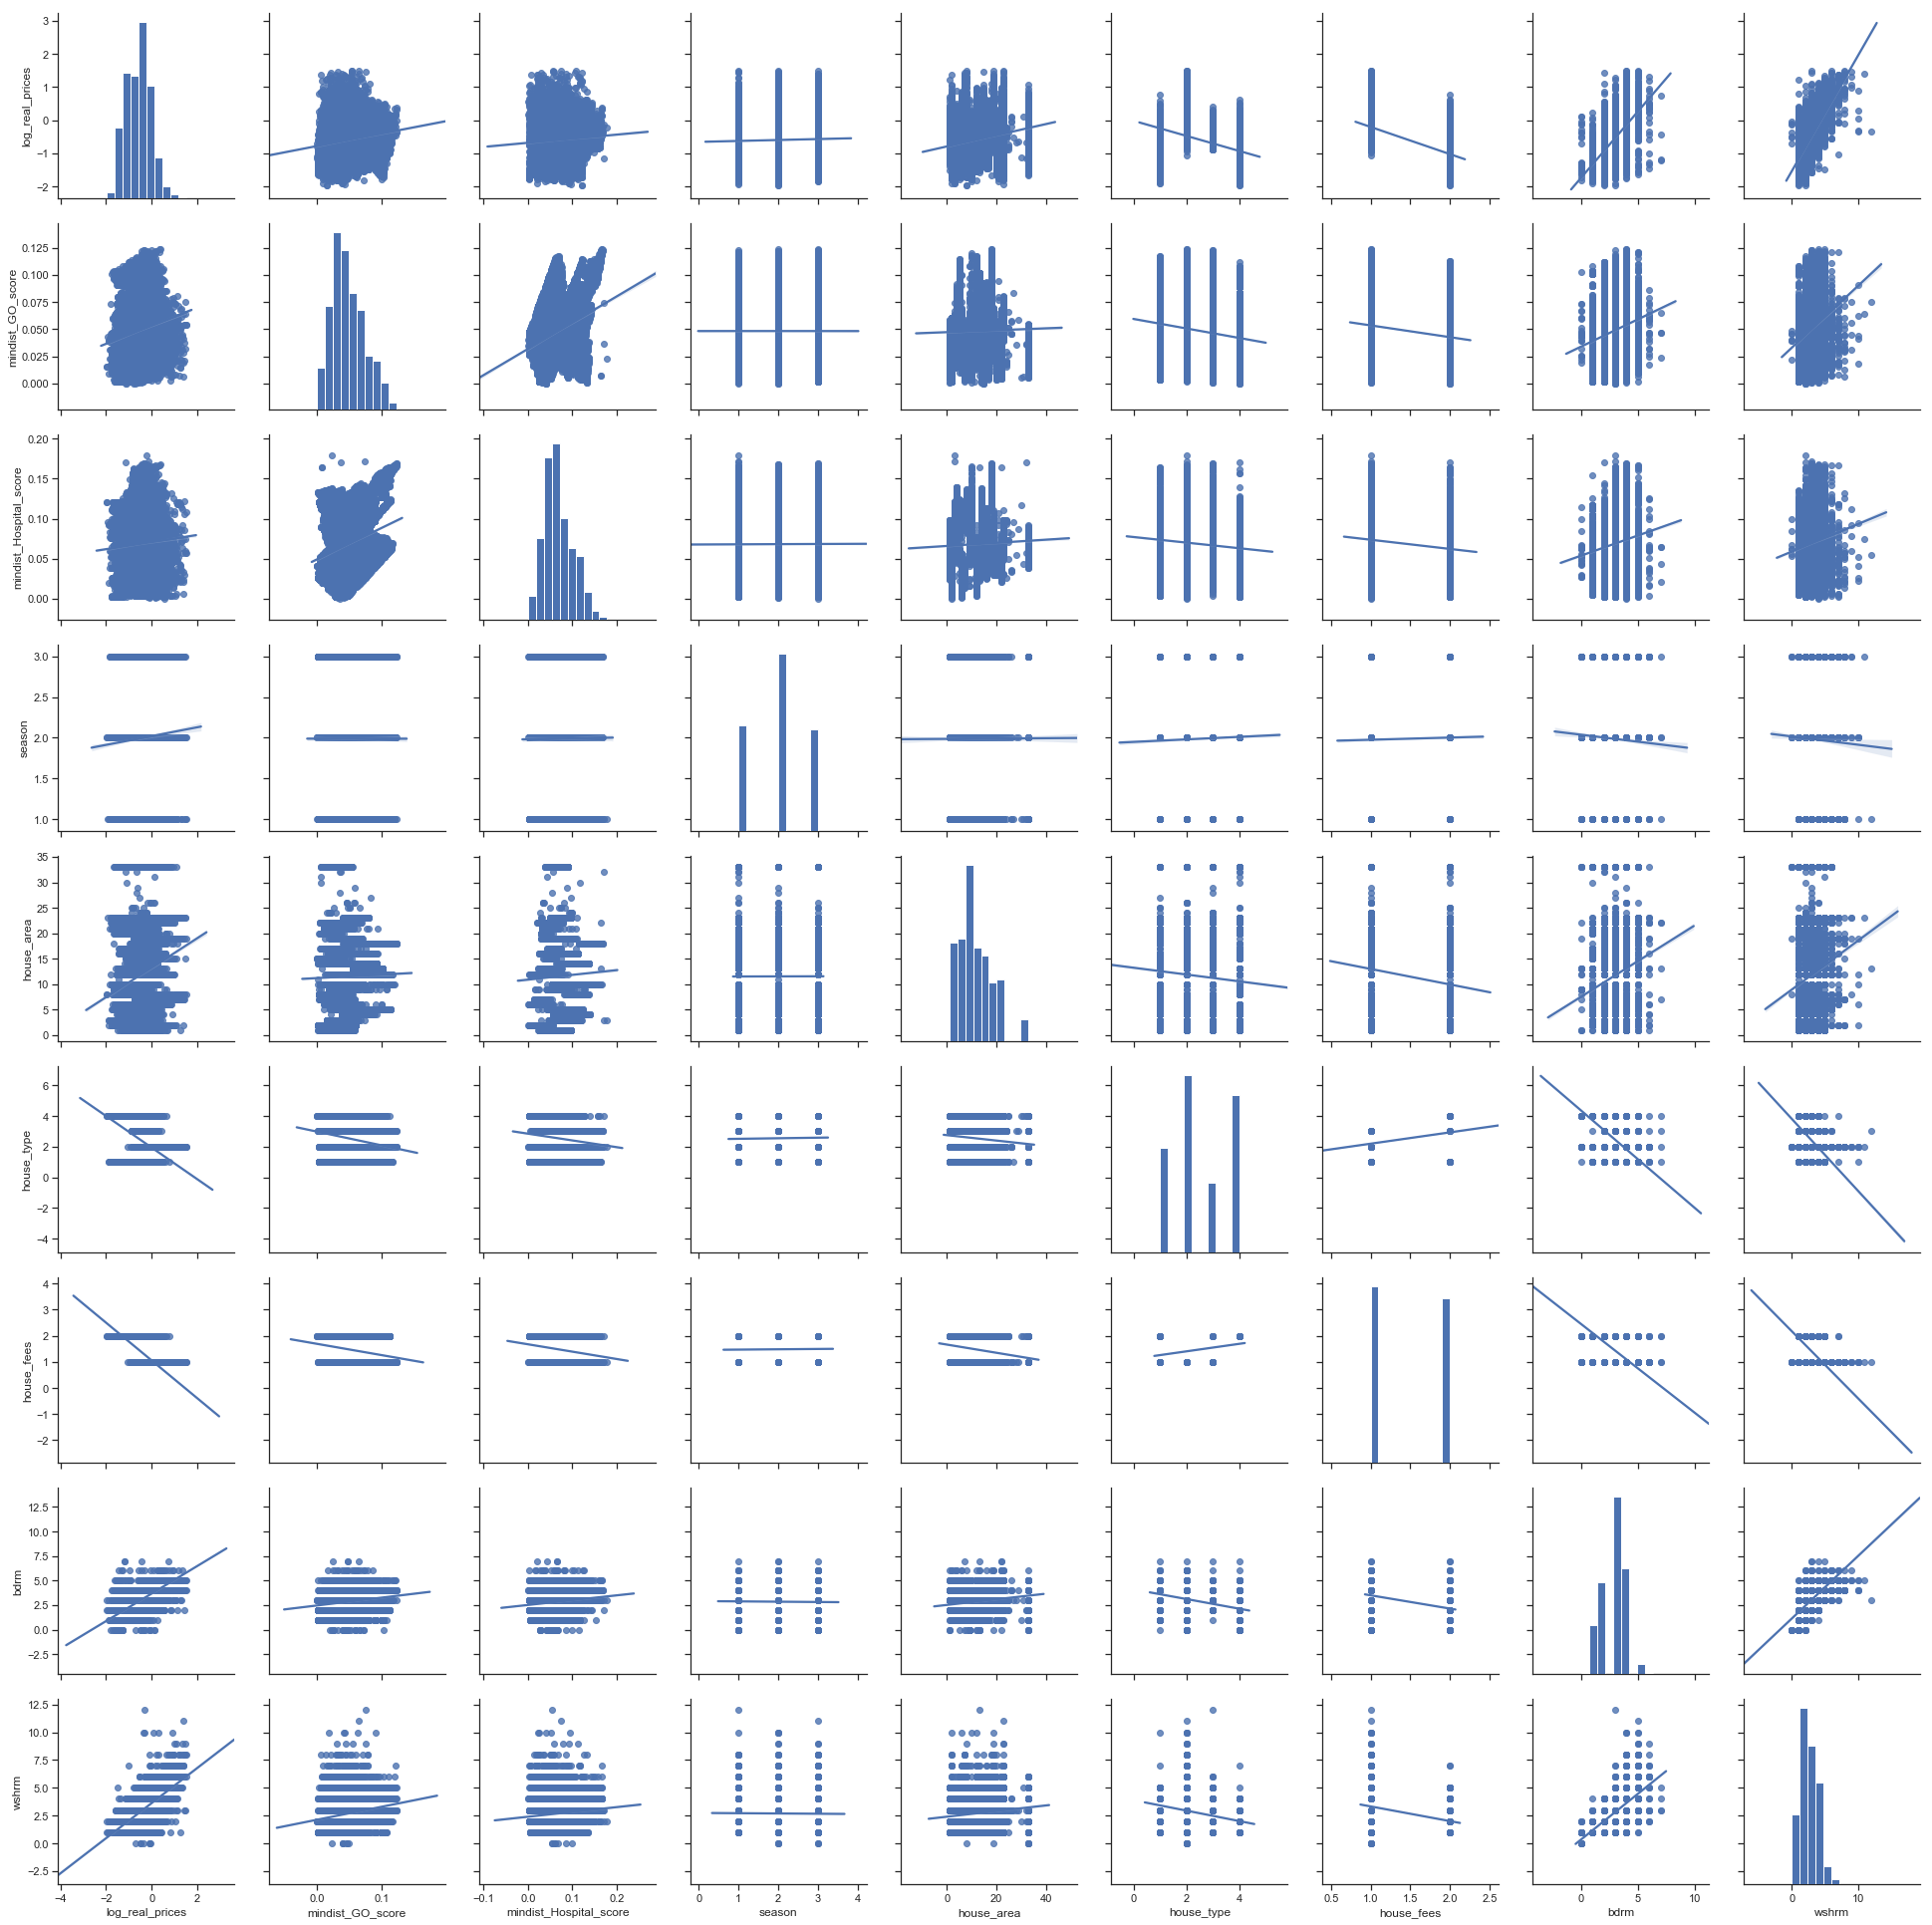

In [21]:
col = ['log_real_prices', 'mindist_GO_score', 'mindist_Hospital_score', 'season', 'house_area', 'house_type', 'house_fees', 'bdrm','wshrm']
sns.set(style='ticks')
sns.pairplot(data_msga[col], size=3, kind='reg')

In [22]:
# def linearRegressionModel():
#     X = data_msga[['mindist_GO_score','mindist_Hospital_score','season','house_area','house_type','house_fees','bdrm','wshrm']]

#     y = data_msga['log_real_prices']


#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#     #Create an instance of a LinearRegression() model named lm.
#     lm = LinearRegression(fit_intercept=False)

#     #Train/fit lm on the training data.
#     lm.fit(X_train,y_train)

#     #print intercept
#     print("The intercept of the model  ")
#     print(lm.intercept_)

    
#     #Print out the coefficients of the model
#     print("The coefficients of the model  ")
#     print(lm.coef_)

#     #print R^2 
#     print("R Squared of the model is  ")
#     print(lm.score(X_train,y_train))

#     #evaluating performance by predicting off the test values
#     predictions = lm.predict(X_test)

#     #scatterplot of the real test values versus the predicted values
#     plt.scatter(y_test,predictions)
#     plt.xlabel('Y Test')
#     plt.ylabel('Predicted Y')
#     plt.show()


#     #evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2)
#     print('MAPE :'," ", metrics.mean_absolute_error(y_test,predictions))

#     # explore the residuals to make sure everything was okay with our data.
#     #Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().

#     sns.distplot(y_test - predictions,bins=50)
#     print(X.columns)
#     house = [[0.033823,0.046684,2,32,1,1,4,3]]
#     showMe = lm.predict(house)
#     print(showMe)

The intercept of the model  
0.0
The coefficients of the model  
[-1.09994383e+00 -1.47540793e+00  3.22867735e-02  1.38088720e-03
 -7.41431723e-02 -5.65329492e-01  4.65915718e-02  1.39299308e-01]
R Squared of the model is  
0.756062294092595


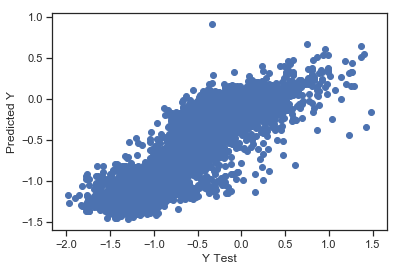

MAPE :   0.19942849165260618
Index(['mindist_GO_score', 'mindist_Hospital_score', 'season', 'house_area',
       'house_type', 'house_fees', 'bdrm', 'wshrm'],
      dtype='object')
[-0.03252786]


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


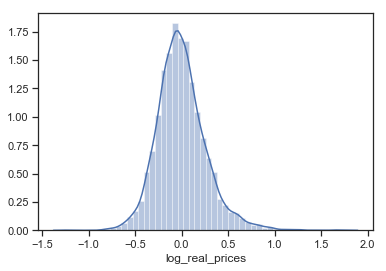

In [23]:
linearRegressionModel()

In [29]:
def OLSModel():
    y = data_msga['log_real_prices']
    data_msga_final = data_msga[['mindist_GO_score','mindist_Hospital_score','season','house_type','house_fees','house_area','wshrm','bdrm']]
    x=data_msga_final.values 
    result = sm.OLS(y,x).fit()
    
    #checking on residuals 
    errors=result.predict(x)-y
    norm_erros = (errors - errors.mean()) / errors.std()
    n,bins,patches=plt.hist(norm_erros,100,facecolor='g')
    plt.xlabel('Normalized_error')
    plt.ylabel('frequencies')
    plt.title('Error Terms Distribution')
    plot.show()
    
    print(data_msga_final.columns)
    house = [[0.033823,0.046684,2,32,1,1,4,3]]
    showMe = result.predict(house)
    print(showMe)
    
    
    return result.summary(xname=['mindist_GO_score','mindist_Hospital_score','season','house_type','house_fees','house_area','wshrm','bdrm'])



## Printing the OLS result Data 

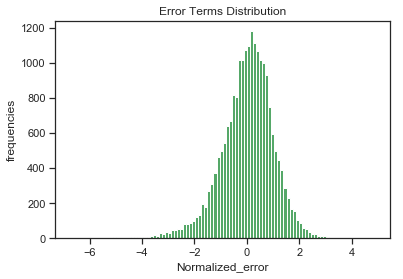

Index(['mindist_GO_score', 'mindist_Hospital_score', 'season', 'house_type',
       'house_fees', 'house_area', 'wshrm', 'bdrm'],
      dtype='object')
[-2.27732369]
                            OLS Regression Results                            
Dep. Variable:        log_real_prices   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                 2.183e+04
Date:                Sat, 13 Apr 2019   Prob (F-statistic):               0.00
Time:                        11:43:56   Log-Likelihood:                -1738.3
No. Observations:               21227   AIC:                             3493.
Df Residuals:                   21219   BIC:                             3556.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err

In [31]:
print(OLSModel())